# Momentum (动量法) 梯度下降

## 1. 基本思想
标准的随机梯度下降 (SGD) 在遇到"沟壑"（ravines）形状的损失面时容易发生振荡。沟壑是指在一个维度上坡度比另一个维度陡峭得多的区域。在这些情况下，SGD 会在峡谷的斜坡之间来回摆动，导致向局部最优解前进的速度非常缓慢。

**动量法 (Momentum)** 旨在解决这个问题。它的核心思想源于物理学：
想象一个小球从山上滚下来。
*   **普通 SGD**：小球每一步只看当前的斜坡方向（梯度），没有惯性。如果路面崎岖，它会剧烈抖动。
*   **Momentum**：小球具有质量和**速度**。在滚动过程中，小球不仅受当前的重力（梯度）影响，还保留了之前的速度（动量）。
    *   如果连续的梯度指向同一个方向，动量会累积，使小球滚得越来越快（加速收敛）。
    *   如果由于地形原因导致梯度方向频繁改变（振荡），之前的动量会平滑这些变化，抑制振荡幅度。

## 2. 数学公式

在标准 SGD 中，参数 $\theta$ 的更新规则是：
$$ \theta_{t+1} = \theta_t - \eta \nabla_\theta J(\theta_t) $$

**Momentum 引入了一个速度变量 $v_t$ (velocity)，更新规则变为：**

$$ \begin{aligned} v_{t+1} &= \gamma v_t + \eta \nabla_\theta J(\theta_t) \\ \theta_{t+1} &= \theta_t - v_{t+1} \end{aligned} $$

有的实现（如 PyTorch 的 SGD 中的 momentum）略有不同，但本质一致：
$$ \begin{aligned} v_{t+1} &= \mu v_t + g_{t+1} \\ p_{t+1} &= p_t - \text{lr} \cdot v_{t+1} \end{aligned} $$

**参数解释：**
*   **$\theta$ ($p$)**: 模型参数。
*   **$\eta$ ($\text{lr}$)**: 学习率。
*   **$\nabla_\theta J(\theta)$ ($g$)**: 当前位置的梯度。
*   **$v$**: 动量（速度）变量，累积了历史梯度的指数加权平均。
*   **$\gamma$ ($\mu$)**: 动量系数（Momentum term），通常设置为 **0.9**。它控制了旧动量的衰减程度（类似于摩擦力）。

## 3. 主要特点
1.  **加速收敛**：在梯度方向一致的维度上，速度项 $v$ 会不断增大，从而加快更新步伐。
2.  **抑制振荡**：在梯度方向经常改变的维度上（如沟壑壁），正负梯度会相互抵消，减小该方向上的更新幅度，使路径更平滑。
3.  **越过局部极小值**：由于惯性的存在，动量法有时可以帮助优化器冲过浅的局部极小值或鞍点。

## 4. 形象对比
*   **SGD**: 醉汉走路，摇摇晃晃，每一步只受当前路况影响。
*   **Momentum**: 推着一个沉重的铁球下坡，一旦启动，很难立即改变方向（抗干扰），且在下坡路上会越跑越快。

### 实验一：

损失函数： $f(x) = 0.1x_1^2 + 2x_2^2$ ，$x_1, x_2$初始值分别为-5, -2， 学习率设为 0.4， 我们使用 <font color="brown">不带动量的传统梯度下降法</font> ， 观察其下降过程

预期分析： 因为 $x_1$ 和 $x_2$ 的系数分别是 0.1 和 2， 这就使得 $x_1$ 和 $x_2$ 的梯度值相差一个量级， 如果使用相同的学习率， $x_2$ 的更新幅度会较 $x_1$ 的更大些。

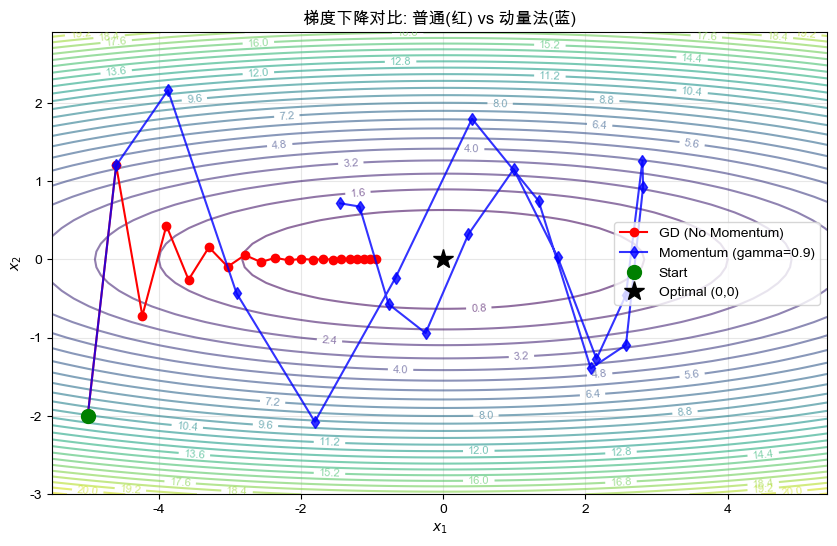

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 设置Matplotlib支持中文
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 
# ---------------------------

def loss_function(x, y):
    # f(x) = 0.1x_1^2 + 2x_2^2
    return 0.1 * x**2 + 2 * y**2

# 初始化参数
eta = 0.
num_epochs = 20

# 1. 普通梯度下降 (无动量)
x, y = -5, -2
result = [(x,y)]

for epoch in range(num_epochs):
    dx = 0.2 * x  # 对x1求导: 0.2*x1
    dy = 4 * y    # 对x2求导: 4*x2
    x -= eta * dx
    y -= eta * dy
    result.append((x,y))

# 2. 带动量的梯度下降
x_m, y_m = -5, -2
v_x, v_y = 0, 0   # 初始速度为0
gamma = 0.5   # 动量系数
result_m = [(x_m, y_m)]

for epoch in range(num_epochs):
    dx = 0.2 * x_m
    dy = 4 * y_m
    
    # 动量更新公式: v_{t+1} = gamma * v_t + eta * gradient
    v_x = gamma * v_x + eta * dx
    v_y = gamma * v_y + eta * dy
    
    # 参数更新: theta_{t+1} = theta_t - v_{t+1}
    x_m -= v_x
    y_m -= v_y
    
    result_m.append((x_m, y_m))

# --- 绘图代码 ---

# 提取普通GD轨迹
x_traj = [p[0] for p in result]
y_traj = [p[1] for p in result]

# 提取Momentum轨迹
x_traj_m = [p[0] for p in result_m]
y_traj_m = [p[1] for p in result_m]

# 创建网格数据用于绘制等高线
X_range = np.arange(-5.5, 5.5, 0.1)
Y_range = np.arange(-3.0, 3.0, 0.1)
X, Y = np.meshgrid(X_range, Y_range)
Z = loss_function(X, Y)

plt.figure(figsize=(10, 6))

# 绘制等高线图
contour = plt.contour(X, Y, Z, levels=30, cmap='viridis', alpha=0.6)
plt.clabel(contour, inline=True, fontsize=8)

# 绘制优化轨迹
plt.plot(x_traj, y_traj, 'r-o', label='GD (No Momentum)')
plt.plot(x_traj_m, y_traj_m, 'b-d', label='Momentum (gamma=0.9)', alpha=0.8) # 蓝色线，用菱形标记区别

# 标记起点和终点
plt.plot(x_traj[0], y_traj[0], 'go', markersize=10, label='Start')
plt.plot(0, 0, 'k*', markersize=15, label='Optimal (0,0)')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title(f'梯度下降对比: 普通(红) vs 动量法(蓝)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

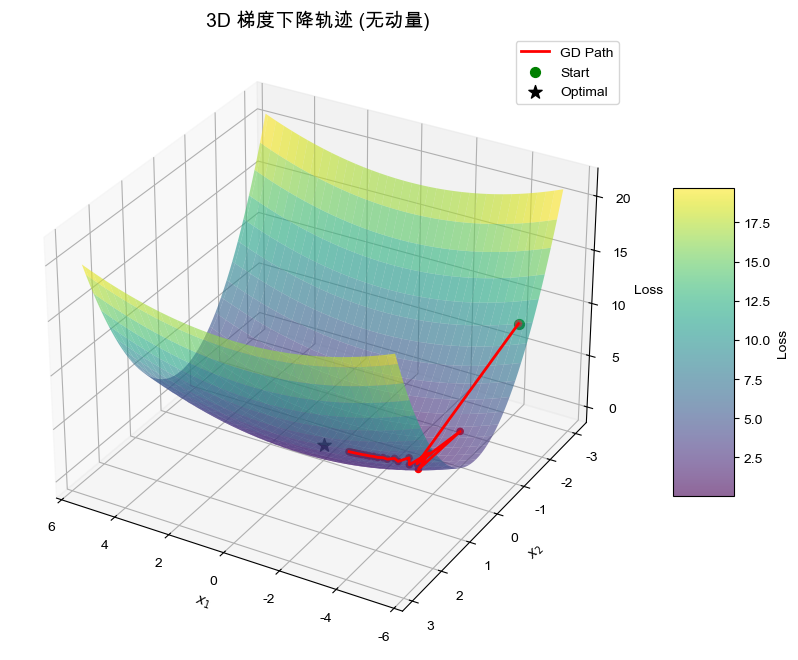

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 计算轨迹上的Z值
# f(x) = 0.1x_1^2 + 2x_2^2
z_traj = [0.1 * x**2 + 2 * y**2 for x, y in zip(x_traj, y_traj)]
z_traj_m = [0.1 * x**2 + 2 * y**2 for x, y in zip(x_traj_m, y_traj_m)]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制3D表面
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, edgecolor='none')

# 绘制优化轨迹 - 普通GD (红色)
ax.plot(x_traj, y_traj, z_traj, 'r-', linewidth=2, label='GD Path', zorder=10)
ax.scatter(x_traj, y_traj, z_traj, c='r', marker='o', s=20, alpha=1.0)

# 绘制优化轨迹 - Momentum (蓝色)
ax.plot(x_traj_m, y_traj_m, z_traj_m, 'b-', linewidth=2, label='Momentum Path', zorder=10)
ax.scatter(x_traj_m, y_traj_m, z_traj_m, c='b', marker='d', s=20, alpha=1.0)

# 标记起点和终点
ax.scatter(x_traj[0], y_traj[0], z_traj[0], c='g', marker='o', s=60, label='Start', zorder=20)
ax.scatter(0, 0, 0, c='k', marker='*', s=150, label='Optimal', zorder=20)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('Loss')
ax.set_title('3D 梯度下降轨迹对比: GD(红) vs Momentum(蓝)', fontsize=14)
ax.view_init(elev=30, azim=120) 

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Loss')
plt.legend()
plt.show()